In [85]:
import pandas as pd
import matplotlib.pyplot as matplot
import numpy

In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
raw_df = pd.read_csv('data/submissions/239171B_data_file_2.csv')

In [88]:
raw_df.describe()

,How many stories does your house have?,"How much is your household's average monthly expenditure in LKR for ""food"" items ?","How much is your household's average monthly expenditure in LKR for ""non-food"" items ?",Nearly how many red notices did you receive last year?
count,58.00000,58.000000,58.000000,58.000000
mean,1.50000,74482.758621,66379.310345,1.344828
std,0.65561,114863.342354,49415.825147,1.978407
min,0.00000,20000.000000,10000.000000,0.000000
25%,1.00000,40000.000000,30000.000000,0.000000
50%,1.00000,50000.000000,50000.000000,0.000000
75%,2.00000,75000.000000,90000.000000,2.000000
max,4.00000,900000.000000,200000.000000,10.000000


In [89]:
raw_df.columns

Index(['Method', 'Timestamp',
       'Which of the following time periods best describes when your house was built?',
       'What do you know about the architecture of the house?',
       'Select the best option which describes your house',
       'How many stories does your house have?',
       'State the area of your house in square feet?',
       'Relationship to the head of the household', 'Gender',
       'Current attendance at school or other educational institution',
       'Main occupation',
       'How much is your household's average monthly expenditure in LKR for "food" items ?',
       'How much is your household's average monthly expenditure in LKR for "non-food" items ?',
       'What is the best representation of the major material your outside walls are made of?',
       'Which of the following options do your house use for ventilation and lighting other than windows and doors (only indoors)?',
       'What is the major type of roof installation used in your house (on 

In [90]:
df = raw_df

In [91]:
df.rename(columns={'Which of the following time periods best describes when your house was built?': 'Year of Construction'}, inplace=True)
df.rename(columns={'How many stories does your house have?': 'Number of Floors'}, inplace=True)
df.rename(columns={'State the area of your house in square feet?': 'Floor Area'}, inplace=True)
df.rename(columns={'Was your wiring done by a professional electrician?': 'Professional Wiring'}, inplace=True)
df.rename(columns={'What is the best representation of the major material your outside walls are made of?': 'Outside Wall Material'}, inplace=True)
df.rename(columns={'What is the major type of roof installation used in your house (on the highest floor)?': 'Roof Installation Type'}, inplace=True)
df.rename(columns={'Which of the following options do your house use for ventilation and lighting other than windows and doors (only indoors)?': 'Ventilation Type'}, inplace=True)
df.rename(columns={'Which district you are residing?': 'District'}, inplace=True)
df.rename(columns={'Which Secretarial division your house belonged?': 'Secretarial Division'}, inplace=True)

In [92]:
df.columns

Index(['Method', 'Timestamp', 'Year of Construction',
       'What do you know about the architecture of the house?',
       'Select the best option which describes your house', 'Number of Floors',
       'Floor Area', 'Relationship to the head of the household', 'Gender',
       'Current attendance at school or other educational institution',
       'Main occupation',
       'How much is your household's average monthly expenditure in LKR for "food" items ?',
       'How much is your household's average monthly expenditure in LKR for "non-food" items ?',
       'Outside Wall Material', 'Ventilation Type', 'Roof Installation Type',
       'Nearly how many red notices did you receive last year?',
       'Which of the below is true regarding your normal bill payment practice (example given when the bill is Rs 4566)?',
       'Professional Wiring',
       'Which of the following do you use in your household for generating electricity?',
       'If using solar energy, which of the followin

In [93]:
def bar_plot(field_name: str):
    value_counts = df[field_name].value_counts()
    cmap = matplot.get_cmap('tab10')
    plt = value_counts.plot(kind='bar',  color=cmap(numpy.arange(len(value_counts))))
    for i, v in enumerate(value_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.set_xlabel(field_name)
    plt.set_ylabel('Respondents')
    plt.set_title(f'Respondents count by {field_name}')

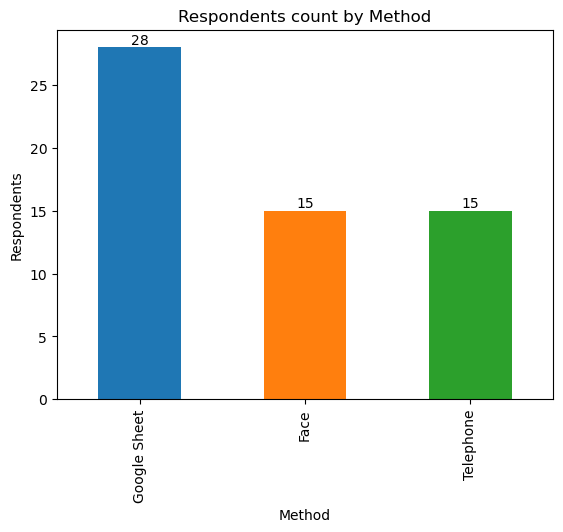

In [94]:
bar_plot('Method')

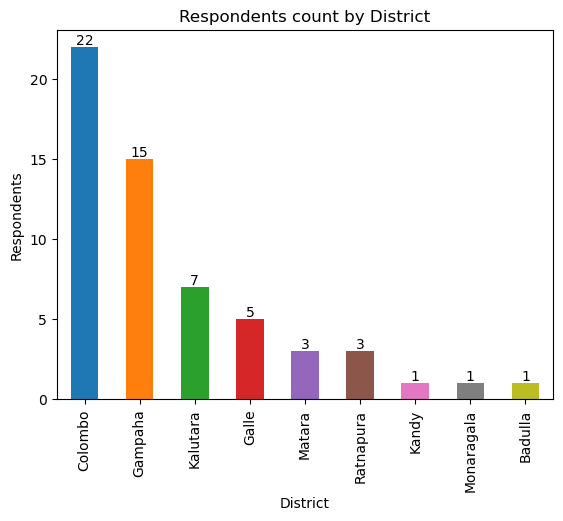

In [95]:
bar_plot('District')

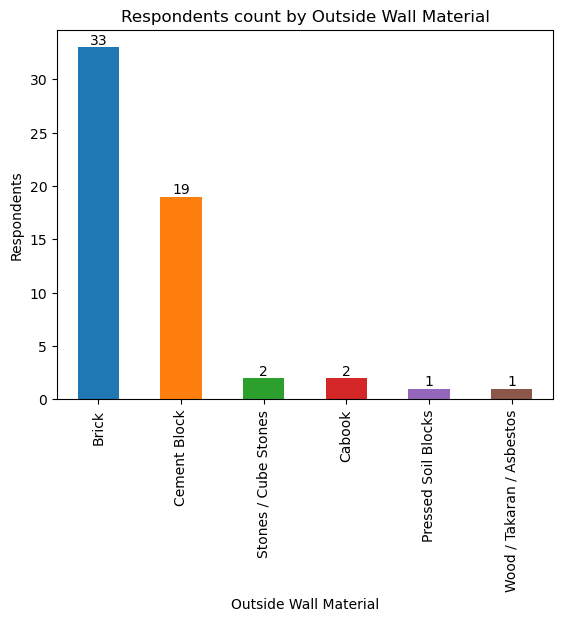

In [96]:
bar_plot('Outside Wall Material')

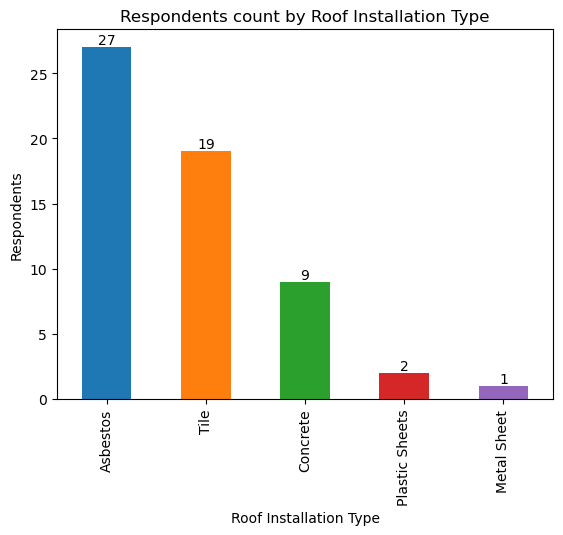

In [97]:
bar_plot('Roof Installation Type')

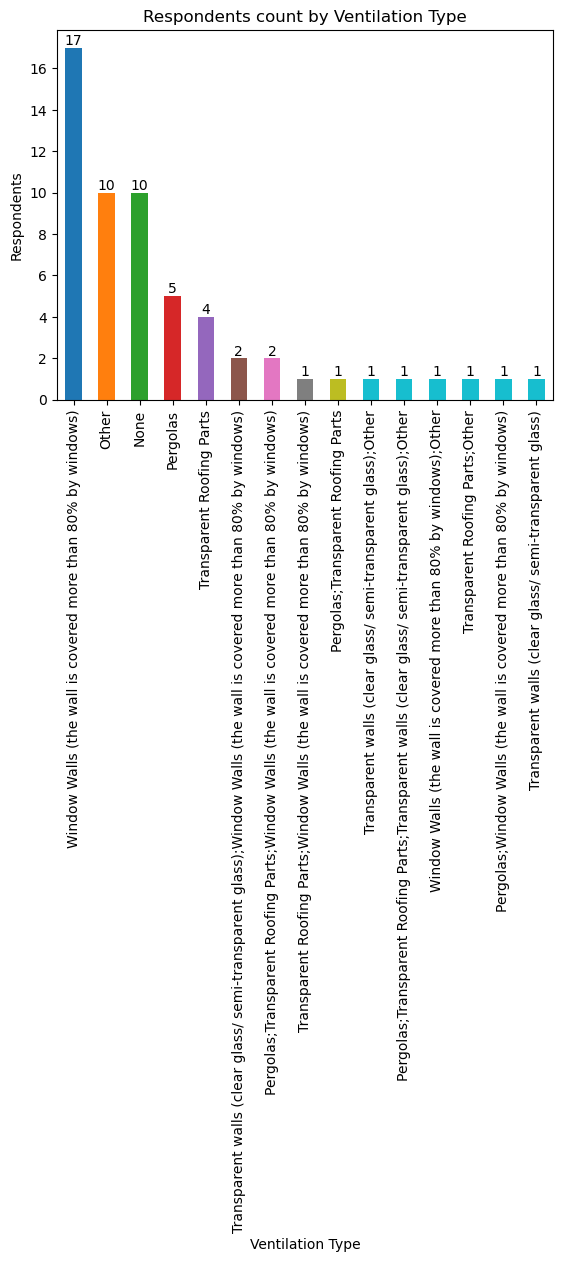

In [98]:
bar_plot('Ventilation Type')

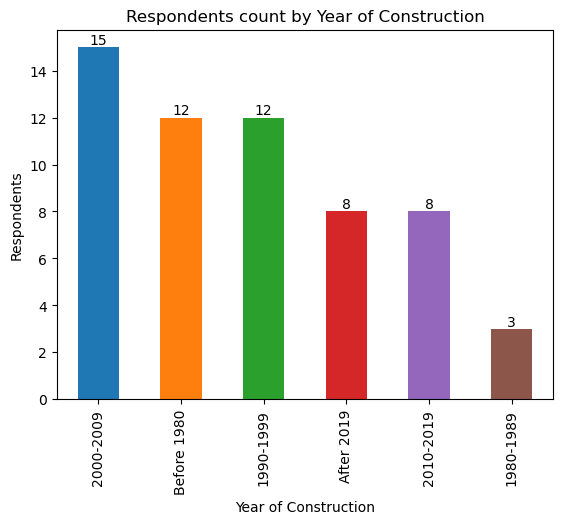

In [99]:
bar_plot('Year of Construction')

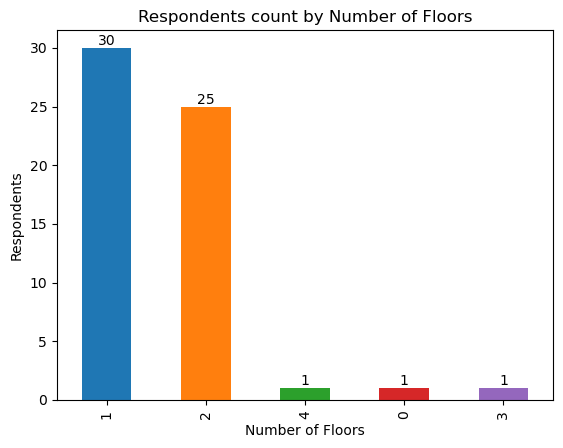

In [100]:
bar_plot('Number of Floors')

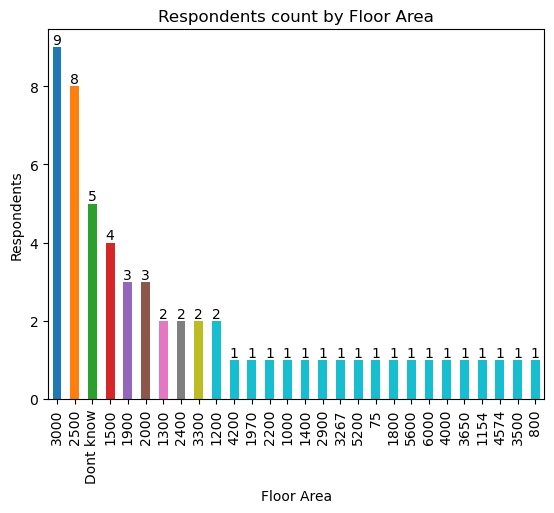

In [101]:
bar_plot('Floor Area')

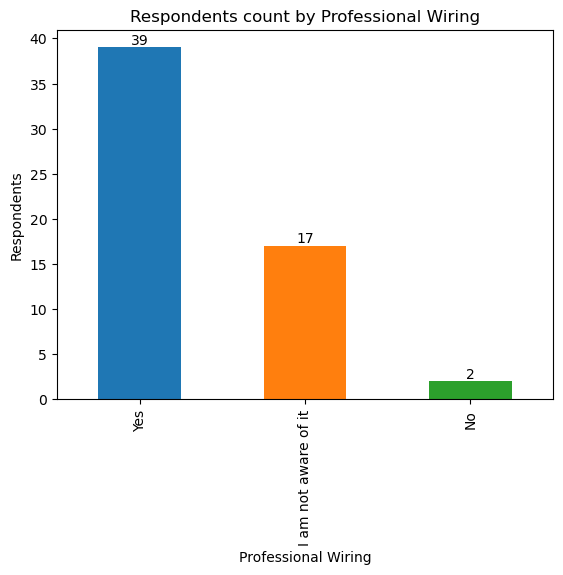

In [102]:
bar_plot('Professional Wiring')